# SIMPLE NN for classification
https://github.com/keras-team/keras/blob/master/examples/reuters_mlp.py

## Trains and evaluate a simple MLP on the Reuters newswire topic classification task.


In [2]:
# Import essential libraries

from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np

import keras
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer

### Load data

In [3]:
max_words = 1000
batch_size = 32
epochs = 5

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

print('Vectorizing sequence data...')
tokenizer = Tokenizer(num_words=max_words) 
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Convert class vector to class matrix '
      '(for use with categorical_crossentropy)')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


Loading data...
2110848/2110848 [==============================] - 0s 0us/step
8982 train sequences
2246 test sequences
46 classes
Vectorizing sequence data...
x_train shape: (8982, 1000)
x_test shape: (2246, 1000)
Convert class vector to class matrix (for use with categorical_crossentropy)
y_train shape: (8982, 46)
y_test shape: (2246, 46)


### Build NN model

In [4]:
print('Building model...')

model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Building model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               512512    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 46)                23598     
                                                                 
 activation_1 (Activation)   (None, 46)                0         
                                                                 
Total params: 536110 (2.05 MB)
Trainable params: 536110 (2.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Run the model

In [5]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
253/253 [==============================] - 1s 4ms/step - loss: 1.4178 - accuracy: 0.6832 - val_loss: 1.0655 - val_accuracy: 0.7686
Epoch 2/5
253/253 [==============================] - 1s 5ms/step - loss: 0.7718 - accuracy: 0.8216 - val_loss: 0.9216 - val_accuracy: 0.7898
Epoch 3/5
253/253 [==============================] - 1s 4ms/step - loss: 0.5496 - accuracy: 0.8675 - val_loss: 0.8702 - val_accuracy: 0.8165
Epoch 4/5
253/253 [==============================] - 1s 4ms/step - loss: 0.4133 - accuracy: 0.8978 - val_loss: 0.8940 - val_accuracy: 0.8009
Epoch 5/5
71/71 [==============================] - 0s 1ms/step - loss: 0.8865 - accuracy: 0.7939
Test score: 0.8865386843681335
Test accuracy: 0.7938557267189026


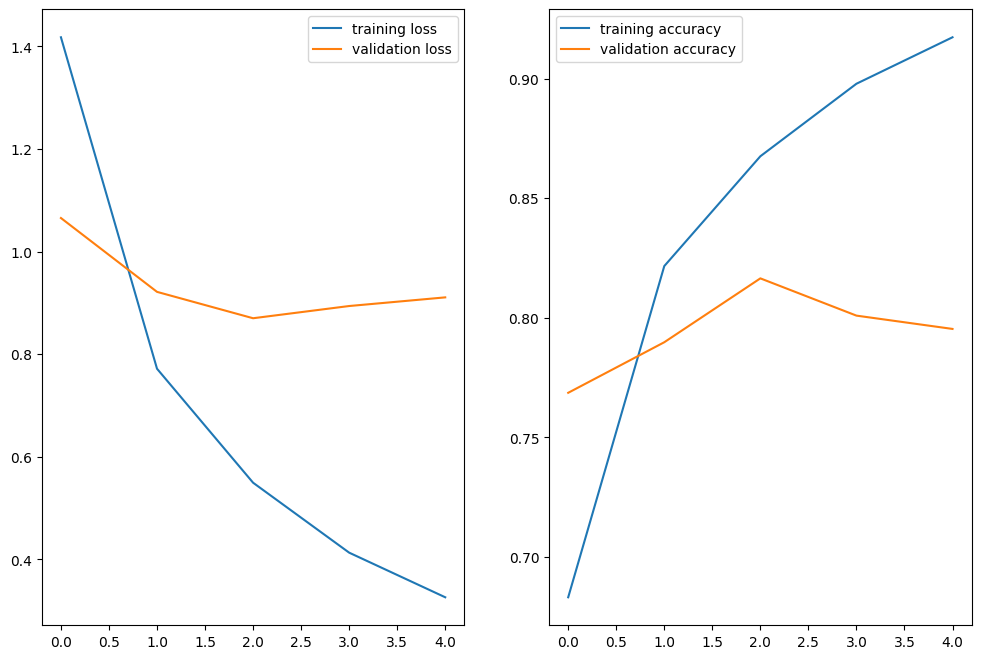

In [6]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12,8))

axs[0].plot(history.history['loss'], label = 'training loss')
axs[0].plot(history.history['val_loss'], label = 'validation loss' )

axs[1].plot(history.history['accuracy'], label = 'training accuracy')
axs[1].plot(history.history['val_accuracy'], label = 'validation accuracy')

for ax in axs:
    ax.legend()

## New Example
https://janakiev.com/blog/keras-iris/

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

### Load IRIS flower dataset and train-test split

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]
print(n_features,n_classes)


4 3


### Visualize the Data
Let’s take a look at our data to see what we are dealing with.

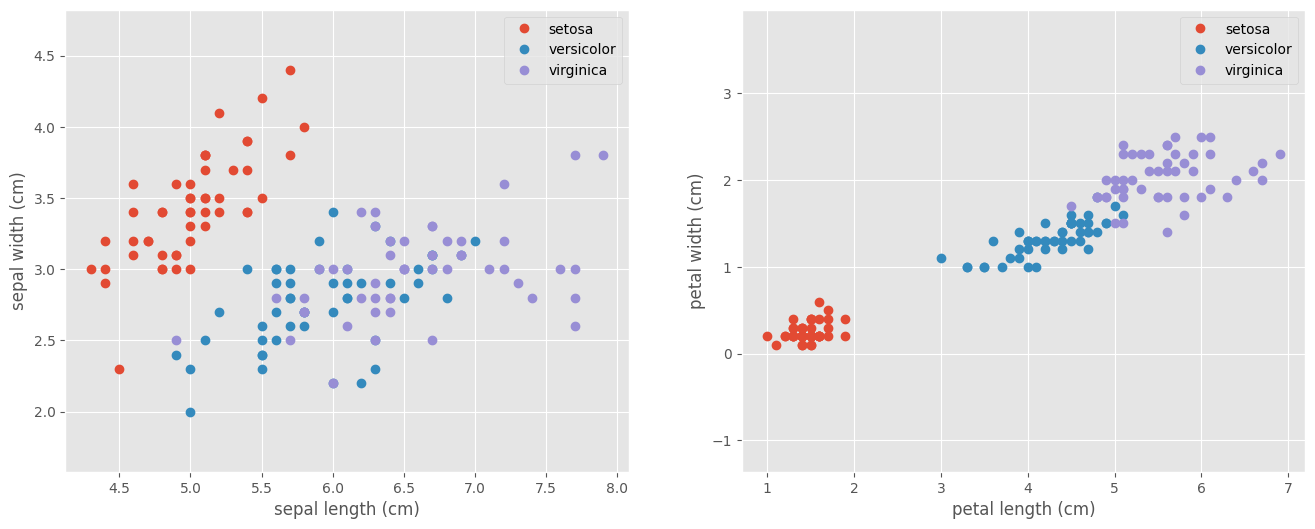

In [9]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

## Configure Neural Network Models
Now we configure the neural networks and we take a look at the summary of the models.

In [10]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras.layers import Dense

def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_custom_model(n_features, n_classes, 8, i, 'model_{}'.format(i)) 
          for i in range(1, 4)]

for create_model in models:
    create_model().summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 40        
                                                                 
 dense_3 (Dense)             (None, 3)                 27        
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 40        
                                                                 
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dense

## Train the Models
Let’s now run the training. Luckily this is a short training, so we won’t have to listen to whirling fans too much. We additionally use Tensorboard as a callback if we want to explore the model and the outputs in detail.

In [11]:
from keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    history_dict[model.name] = [history_callback, model]

Model name: model_1
Test loss: 0.2956836521625519
Test accuracy: 0.8933333158493042
Model name: model_2
Test loss: 0.24730916321277618
Test accuracy: 0.9333333373069763
Model name: model_3
Test loss: 0.49835801124572754
Test accuracy: 0.9333333373069763


### Plot Accuracy and Loss from Training
Let’s have a look how our models perform. We can clearly see that adding more nodes makes the training perform better.

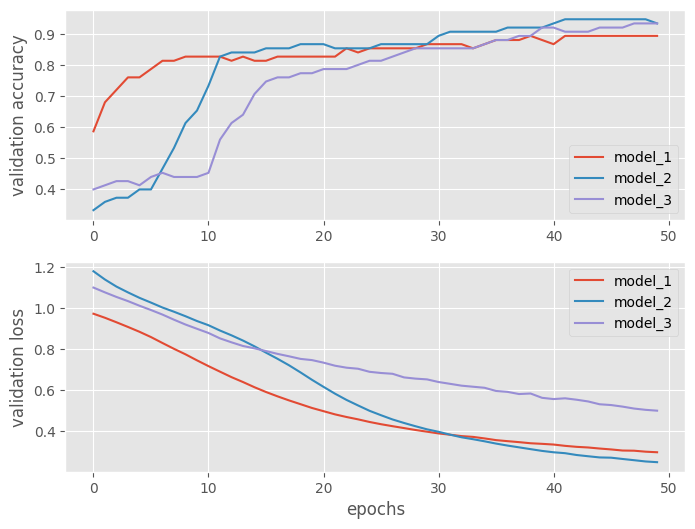

In [12]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_accurady = history_dict[model_name][0].history['val_accuracy']
    val_loss = history_dict[model_name][0].history['val_loss']
    ax1.plot(val_accurady, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend();